# Churn for Bank Customers

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from collections import Counter

In [2]:
df = pd.read_csv("Bank_customer_churn.csv")
df_copy = df.copy()
df_copy.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df_copy.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#We have 3 String variables. (Surname, Geography, Gender)
#We have 11 numerical variables. 
#(RowNumber, CustomerId, CreditScore, Age, 
 #Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited)

In [6]:
df_copy.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
df_copy.drop(["RowNumber","CustomerId","Surname"], axis = 1 , inplace = True)
df_copy.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Data Visualization 

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


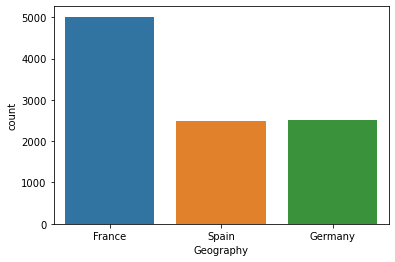

In [8]:
sns.countplot(df_copy['Geography'])
plt.show()

In [9]:
#Customers mainly live in France, the number of customers living in Germany and Spain is very close.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


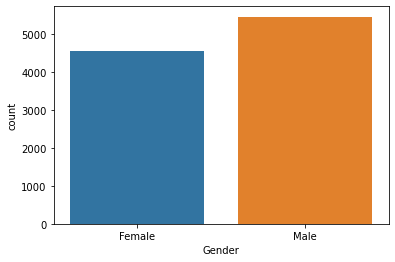

In [10]:
sns.countplot(df_copy['Gender'])
plt.show()

In [11]:
#Customers' gender is predominantly male but their numbers are close to each other, 
#so we can say that it is a balanced variable.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


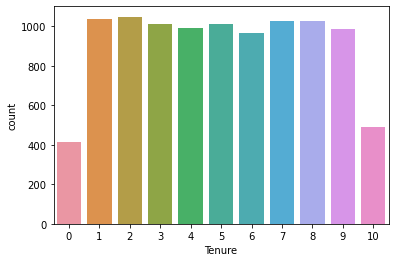

In [12]:
sns.countplot(df_copy['Tenure'])
plt.show()

In [13]:
#We have understood that customers have generally been customers of the bank for 1 to 9 years.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


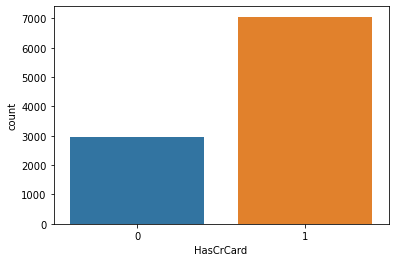

In [14]:
sns.countplot(df_copy['HasCrCard'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


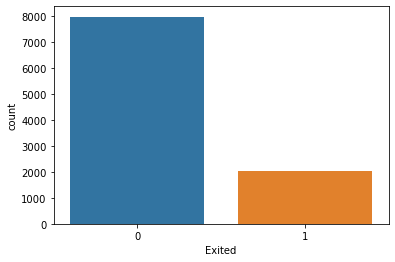

In [15]:
sns.countplot(df_copy['Exited'])
plt.show()

In [16]:
#Outiers

In [17]:
list_to_check = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]

In [18]:
#Creating a function to check for outliers for each variable 
def outlier_show(variable):
    
    sns.boxplot(df_copy[variable])
    plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


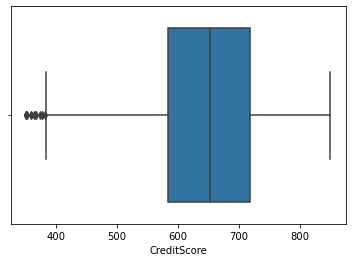

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


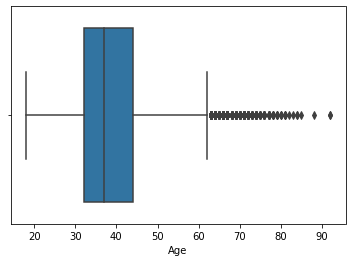

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


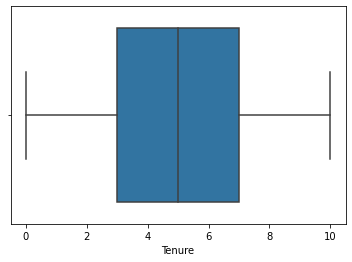

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


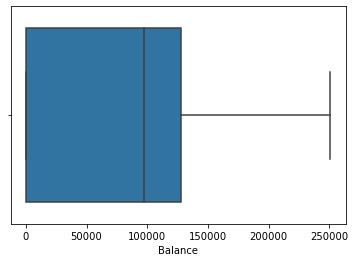

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


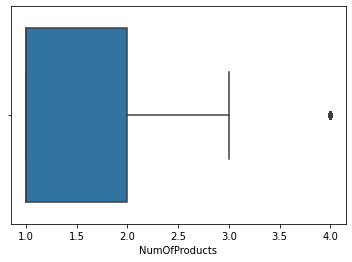

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


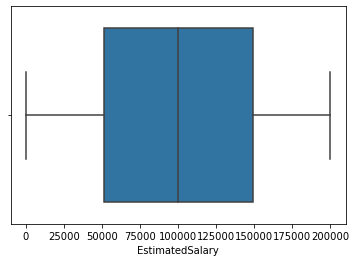

In [19]:
for i in list_to_check:
    outlier_show(i)

In [20]:
#The variables Credit Score, Age, Num Products have outlier observations.

In [21]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df_copy.Age.quantile(0.75)-df_copy.Age.quantile(0.25)

In [22]:
#### Extreme outliers
lower_bridge=df_copy['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df_copy['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-4.0
80.0


(None, None)

In [23]:
df_copy.loc[df_copy['Age']>=80,'Age']=80

In [24]:
 def outlier(df_ol, list):
    
    new_list = []
    
    for i in list:
        
        Q1 = df_ol[i].quantile(0.25)
        Q3 = df_ol[i].quantile(0.75)


        IQR = Q3 - Q1

        lower_bridge = Q1 - 1.5*IQR
        upper_bridge = Q3 + 1.5*IQR

        outlier = ((df_ol[i] < lower_bridge) | (df_ol[i] > upper_bridge))

        against_observation = df_ol[i][outlier]
        against_index = against_observation.index
        
        new_list.extend(against_index)
        
    new_list = Counter(new_list)
    #counter it will be converted to a hashtable object wherein the elements
    #will become keys and the values will be the count of the elements from the tuple given
    outlier_index = [i for i, v in new_list.items() if v > 0]
    
    return outlier_index

In [25]:
outlier_index = outlier(df_copy, ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"])

In [26]:
df_copy.loc[outlier_index]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
...,...,...,...,...,...,...,...,...,...,...,...
9323,644,France,Male,50,9,76817.00,4,1,0,196371.13,1
9370,561,France,Male,43,4,0.00,4,0,0,18522.91,1
9411,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1
9540,727,Germany,Male,46,3,115248.11,4,1,0,130752.01,1


In [27]:
df_copy.shape

(10000, 11)

In [28]:
df_copy = df_copy.drop(outlier_index, axis = 0).reset_index(drop = True)

In [29]:
df_copy.shape

(9568, 11)

In [30]:
list_to_check = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]

In [31]:
#Creating a function to check for outliers for each variable 
def outlier_show(variable):
    
    sns.boxplot(df_copy[variable])
    plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


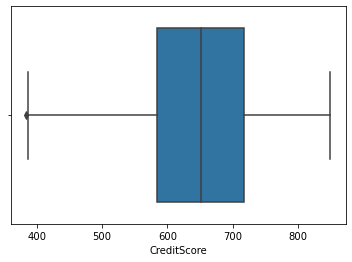

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


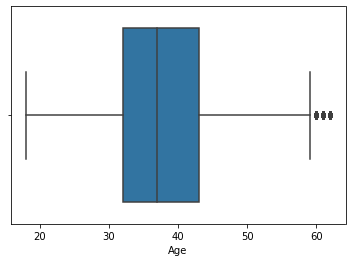

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


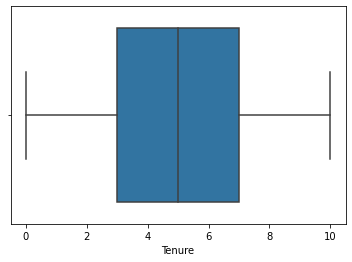

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


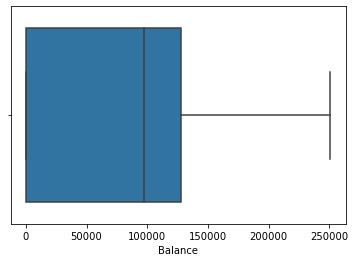

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


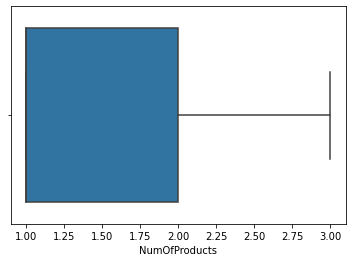

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


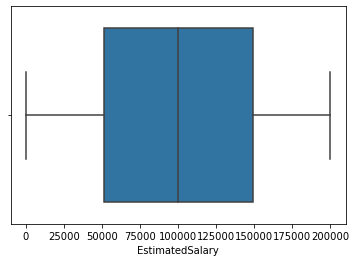

In [32]:
for i in list_to_check:
    outlier_show(i)

<AxesSubplot:>

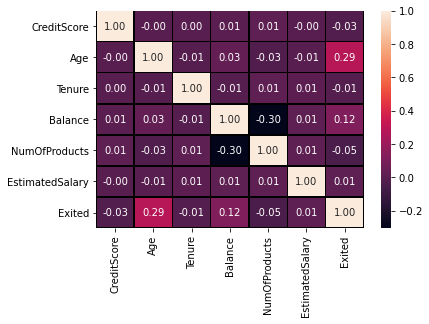

In [33]:

list_corr = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"]
sns.heatmap(df[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f')

In [34]:
#Age has the strongest relation with Exited (0.29). 
#Here we can make the following comment:
#As the age of the customer increases, the rate of losing the customer increases. (Positive strong relationship)
#Exited and Balance variable have a relatively strong relationship (0.12).

# Feature Engineering

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9568 non-null   int64  
 1   Geography        9568 non-null   object 
 2   Gender           9568 non-null   object 
 3   Age              9568 non-null   int64  
 4   Tenure           9568 non-null   int64  
 5   Balance          9568 non-null   float64
 6   NumOfProducts    9568 non-null   int64  
 7   HasCrCard        9568 non-null   int64  
 8   IsActiveMember   9568 non-null   int64  
 9   EstimatedSalary  9568 non-null   float64
 10  Exited           9568 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 822.4+ KB


In [36]:
df_copy["NumOfProducts"] = df_copy["NumOfProducts"].astype("category")
df_copy["HasCrCard"] = df_copy["HasCrCard"].astype("category")
df_copy["IsActiveMember"] = df_copy["IsActiveMember"].astype("category")

df_copy = pd.get_dummies(df_copy, columns = ["Geography"])
df_copy = pd.get_dummies(df_copy, columns = ["Gender"])
df_copy = pd.get_dummies(df_copy, columns = ["NumOfProducts"])
df_copy = pd.get_dummies(df_copy, columns = ["HasCrCard"])
df_copy = pd.get_dummies(df_copy, columns = ["IsActiveMember"])

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9568 non-null   int64  
 1   Age                9568 non-null   int64  
 2   Tenure             9568 non-null   int64  
 3   Balance            9568 non-null   float64
 4   EstimatedSalary    9568 non-null   float64
 5   Exited             9568 non-null   int64  
 6   Geography_France   9568 non-null   uint8  
 7   Geography_Germany  9568 non-null   uint8  
 8   Geography_Spain    9568 non-null   uint8  
 9   Gender_Female      9568 non-null   uint8  
 10  Gender_Male        9568 non-null   uint8  
 11  NumOfProducts_1    9568 non-null   uint8  
 12  NumOfProducts_2    9568 non-null   uint8  
 13  NumOfProducts_3    9568 non-null   uint8  
 14  HasCrCard_0        9568 non-null   uint8  
 15  HasCrCard_1        9568 non-null   uint8  
 16  IsActiveMember_0   9568 

In [38]:
df_copy.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,101348.88,1,1,0,0,1,0,1,0,0,0,1,0,1
1,608,41,1,83807.86,112542.58,0,0,0,1,1,0,1,0,0,1,0,0,1
2,502,42,8,159660.80,113931.57,1,1,0,0,1,0,0,0,1,0,1,1,0
3,699,39,1,0.00,93826.63,0,1,0,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,79084.10,0,0,0,1,1,0,1,0,0,0,1,0,1


# Modelling

In [39]:
X = df_copy.drop("Exited",axis=1)
y = df_copy["Exited"]


In [40]:
from sklearn.model_selection import train_test_split
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [41]:
X_train

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
6278,504,40,5,0.00,146703.36,0,0,1,0,1,0,1,0,1,0,1,0
1824,535,49,7,115309.75,111421.77,0,0,1,1,0,1,0,0,0,1,1,0
7699,771,47,3,72664.00,107874.39,0,0,1,1,0,0,1,0,0,1,0,1
8145,767,48,9,0.00,175458.21,1,0,0,0,1,0,1,0,1,0,0,1
5349,617,50,7,0.00,184839.70,0,0,1,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,787,46,7,117685.31,93360.35,1,0,0,0,1,0,1,0,0,1,0,1
6049,642,19,3,113905.48,176137.20,0,1,0,1,0,1,0,0,0,1,0,1
3065,801,32,4,75170.54,37898.50,1,0,0,1,0,1,0,0,0,1,0,1
6876,736,42,7,117280.23,41921.06,1,0,0,1,0,0,0,1,1,0,1,0


In [42]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### GradientBoosting 

In [44]:
# GB Confusion Matrix
model_GB = GradientBoostingClassifier()
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1481,   60],
       [ 200,  173]], dtype=int64)

In [45]:
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  173
True Negative :  1481
False Positive:  60
False Negative:  200


In [46]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1681
           1       0.46      0.74      0.57       233

    accuracy                           0.86      1914
   macro avg       0.71      0.81      0.75      1914
weighted avg       0.90      0.86      0.88      1914



In [47]:
kfold = KFold(n_splits=10)


In [48]:
cv_results = cross_val_score(model_GB, X, y, cv=10, scoring="accuracy")

In [49]:
cv_results.mean()

0.8608884983145553

### KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [51]:
y_pred = knn_model.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred)

0.7737722048066875

In [53]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [54]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [55]:
print("The best parameters: " + str(knn_cv.best_params_))

The best parameters: {'n_neighbors': 30}


In [62]:
knn = KNeighborsClassifier(30)
knn_model = knn.fit(X_train, y_train)

In [63]:
y_pred = knn_model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.8051201671891327

In [59]:
# Classification Report for XGB Model
print(classification_report(knn_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1914
           1       0.00      0.00      0.00         0

    accuracy                           0.81      1914
   macro avg       0.50      0.40      0.45      1914
weighted avg       1.00      0.81      0.89      1914



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparision between both models

In [65]:
models = [
    knn_model,
    model_GB
     
        ]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 80.5120%
----------------------------
GradientBoostingClassifier:
Accuracy: 86.4159%


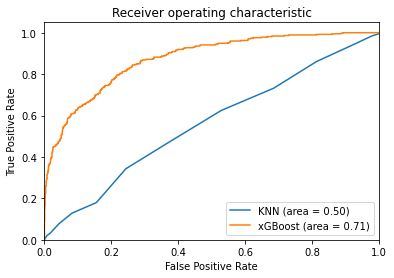

In [66]:

knn_roc_auc = roc_auc_score(y_test, knn_model.predict(X_test))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, model_GB.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model_GB.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='xGBoost (area = %0.2f)' % rf_roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()